<H1>Ananlysis of the hollywood movies using pandas and numpy</H1>

In [29]:
import re
import kagglehub
import shutil
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

<H2>This block isn't run every time</h2>
As the data is already fetched and in the Dataset folder

In [ ]:
#downloading the dataset
path = kagglehub.dataset_download("danielgrijalvas/movies")
print(path)

#moving the dataset to the required directory
Home_directory = "D:\Projects\Data-Repo\Datasets"
shutil.move(path, Home_directory)

100%|██████████| 424k/424k [00:01<00:00, 338kB/s]

Extracting files...
C:\Users\vishu\.cache\kagglehub\datasets\danielgrijalvas\movies\versions\2


<H4>Defining the type of plot </H4>

In [2]:
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #the default figure size

<H4> Starting the initialisation and dataframes</H4>

In [ ]:
# Importing the dataset
df = pd.read_csv("D:\Projects\Data-Repo\Datasets\movies.csv").dropna()
# using dropna() function to remove the rows with missing values as they can affect the analysis

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vishu\AppData\Local\Temp\ipykernel_1268\1147736121.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Data-Repo\Datasets\movies.csv").dropna()


<H4>Can be used multiple times to amke sure the execution of each block is done properly</H4>

In [31]:
df.head() #checking and verifying if the data is imported correctly

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [24]:
# checking for the missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 2)))

df.dtypes #checking the data types of the columns

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
year_correct - 0.0%


name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
year_correct     object
dtype: object

In [32]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64') #changing the data types of the columns to int64
df['year_correct'] = df['released'].str.extract(r'(\d{4})') #extracting the year from the released column

In [37]:
df.sort_values(by='gross', inplace=False, ascending=False) #sorting the dataframe by gross column

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


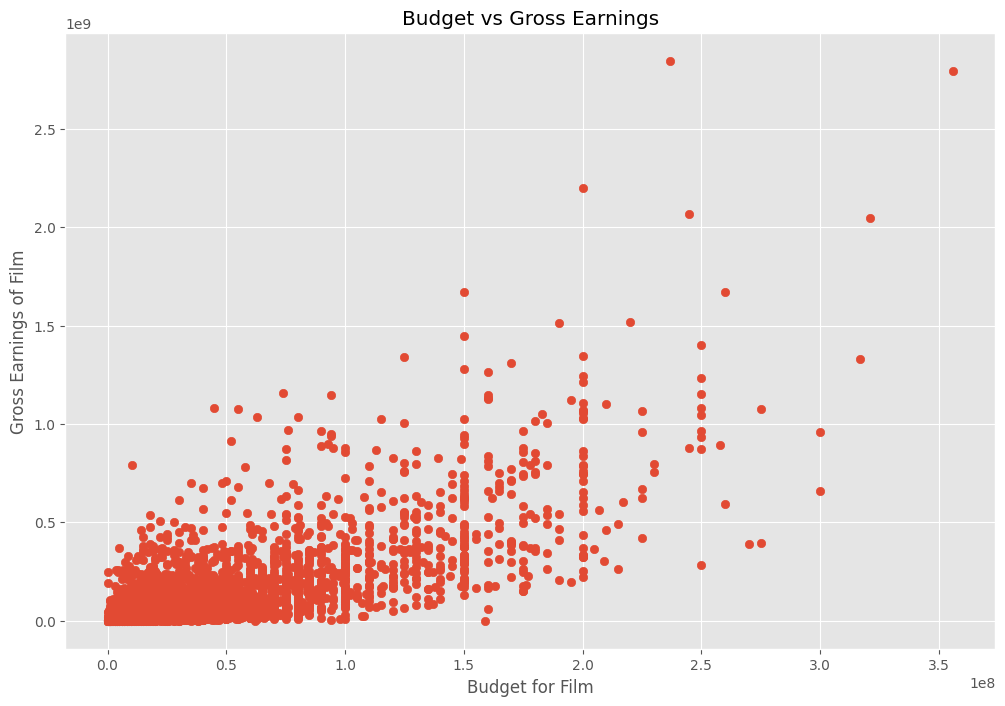

In [39]:
plt.scatter(x='budget', y='gross', data=df) #creating a scatter plot to visualize the relationship between budget and gross
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings of Film')
plt.show()

          budget     gross     votes
budget  1.000000  0.740247  0.439675
gross   0.740247  1.000000  0.614751
votes   0.439675  0.614751  1.000000


<Axes: xlabel='budget', ylabel='gross'>

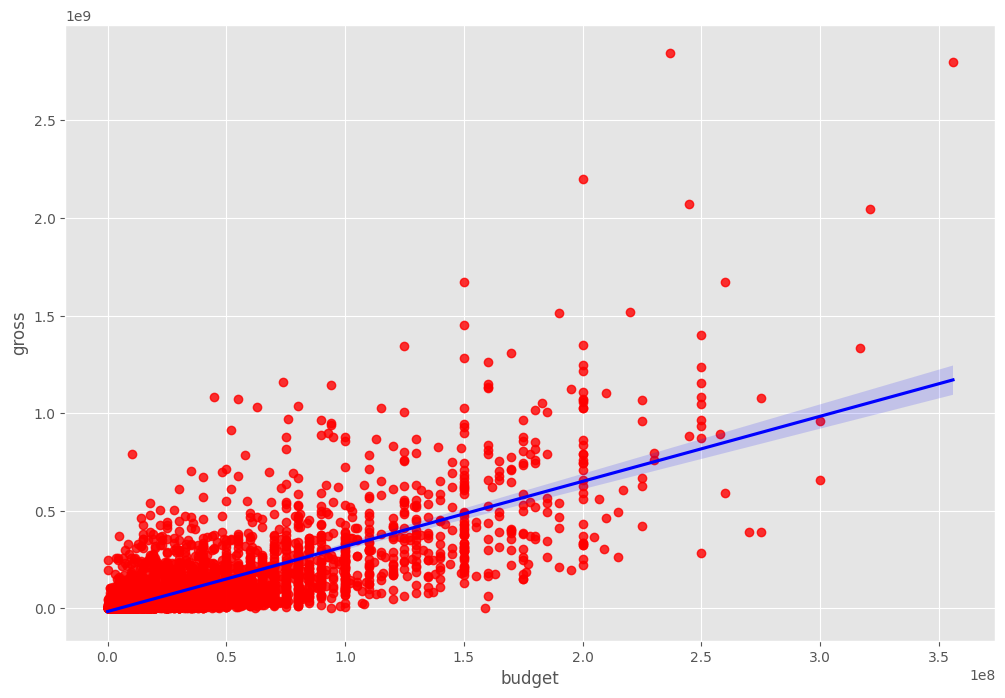

In [60]:
print(df[['budget','gross','votes']].corr())#calculating the correlation between budget and gross earnings
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}) #creating a regression plot to visualize the relationship

The upward blue line indicates a positive relation between the entries

In [53]:
# Finding which columns are most correlated
correlation_matrix = df.corr(numeric_only=True) #calculating the Pearson correlation coefficient for all numeric columns

High correlation between budget, votes vs gross

Text(120.72222222222221, 0.5, 'Features')

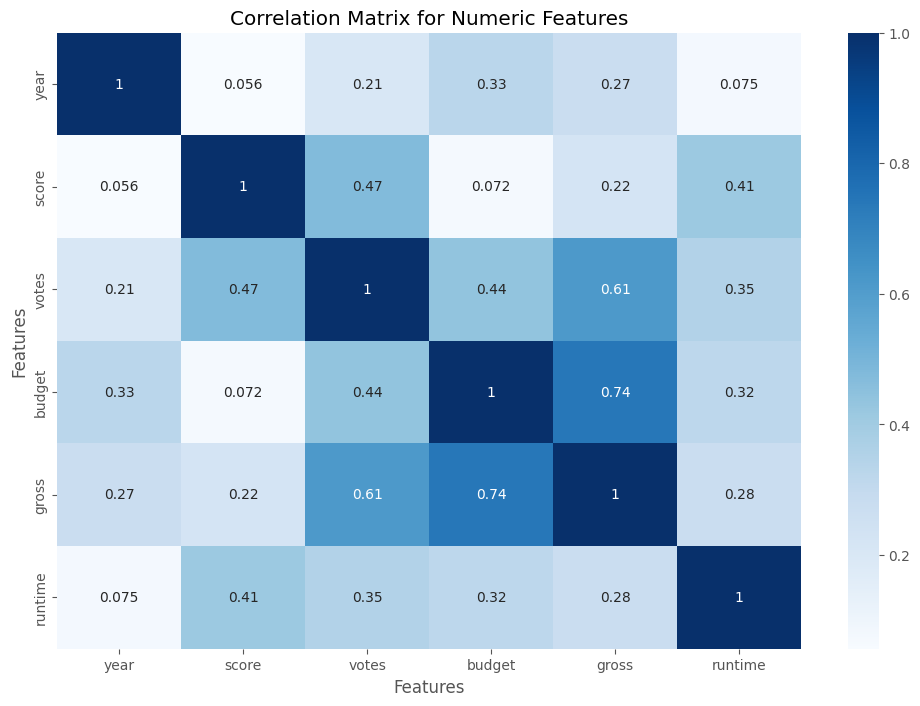

In [62]:
sns.heatmap(correlation_matrix, annot=True, cmap='Blues') #creating a heatmap to visualize the correlation matrix
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

<H4>Making the string and object fields as Numerical to find correlations</H4>

In [63]:
df_numerized = df.copy() #creating a copy of the dataframe to avoid modifying the original dataframe

for col_name in df_numerized.columns: #iterating through the columns of the dataframe
    if df_numerized[col_name].dtype == 'object': #checking if the column is of object type
        df_numerized[col_name] = df_numerized[col_name].astype('category') #converting the column to category type
        df_numerized[col_name] = df_numerized[col_name].cat.codes #encoding the categorical columns to numerical values

df_numerized.head() #checking the first few rows of the numerized dataframe

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0


Text(120.72222222222221, 0.5, 'Features')

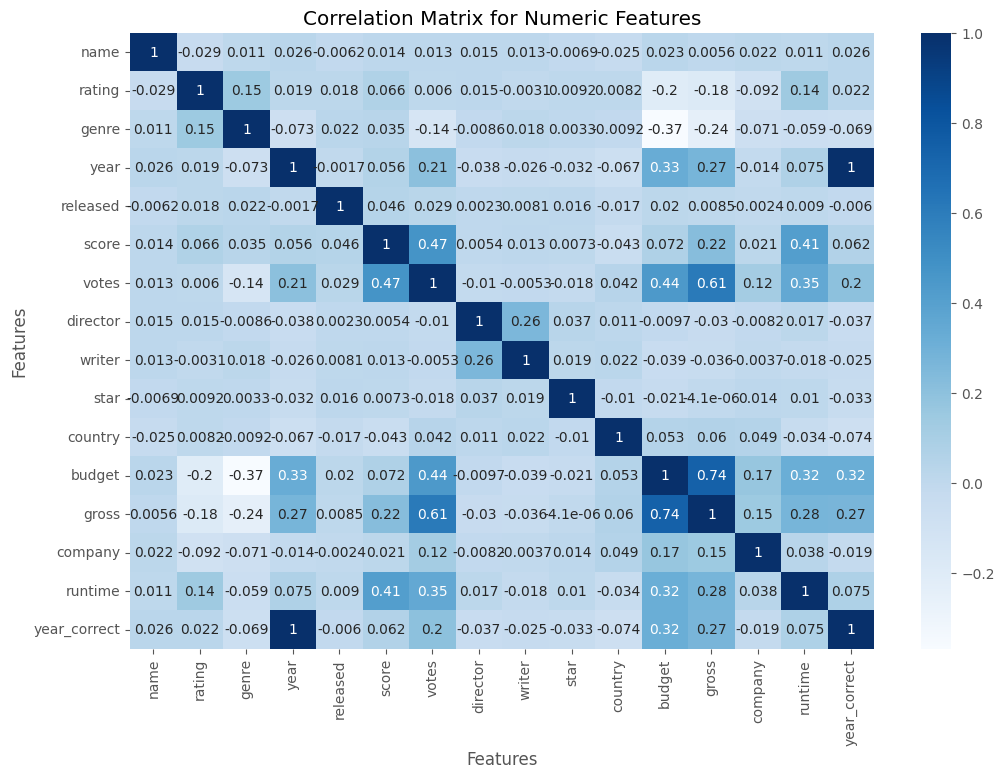

In [67]:
correlation_matrixx = df_numerized.corr() #calculating the correlation matrix for the numerized dataframe
sns.heatmap(correlation_matrixx, annot=True, cmap='Blues') #creating a heatmap to visualize the correlation matrix
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

<H4>Most affective factor seems to be Gross Earnings finding correlation of all the other features with it</H4>

Text(120.72222222222221, 0.5, 'Features')

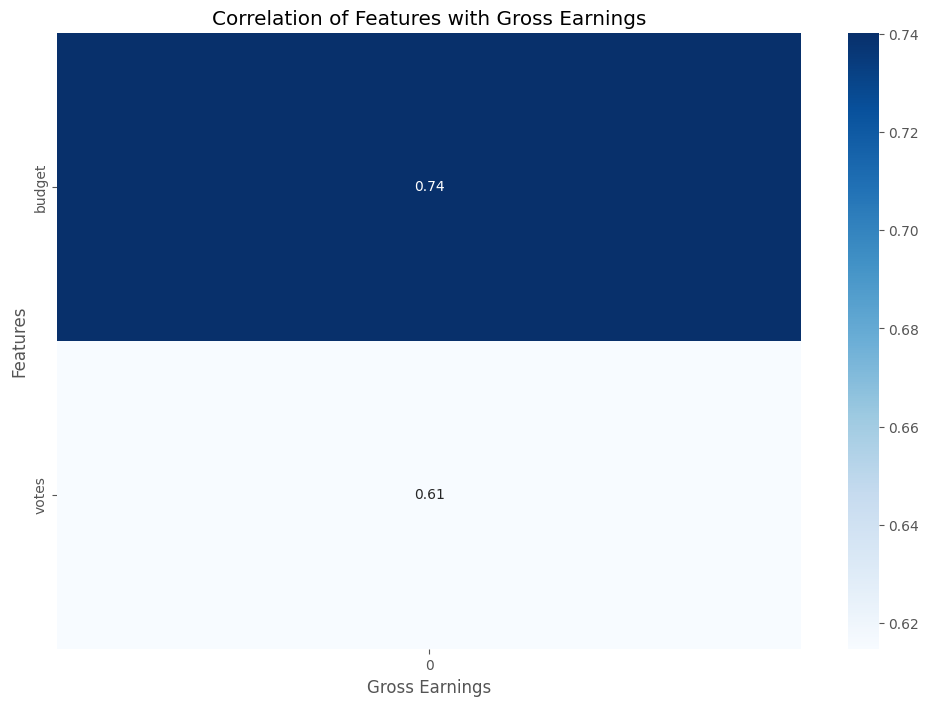

In [78]:
correlation = df_numerized.corrwith(df_numerized['gross']).drop('gross') #calculating the correlation of all columns with the gross column and dropping the gross column itself
correlation = correlation.sort_values(ascending=False) #sorting the correlation values in descending order
correlation = correlation[correlation > 0.5] #filtering the correlation values to only include those with an absolute value greater than 0.5
sns.heatmap(correlation.to_frame(), annot=True, cmap='Blues') #creating a heatmap to visualize the correlation values
plt.title('Correlation of Features with Gross Earnings')
plt.xlabel('Gross Earnings') 
plt.ylabel('Features')

We can conclude that votes and Budget are most related to the Gross earnings of a movie and thus help identify the patterns that neeed focusing on for the growth of a movie